## classify movie reviews as positive or negative

IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

Te sequence of words have been turned into sequences of integers. Each integer is a spcific word in a dictionary

num_words=10000 -> only keep the top 10,000 most frequently occurring words in the training data. We don't want any words that appear rarely or only once  

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
train_labels[0]

1

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Can't directly feed lists into NN -> (a) padd list or (b) use multi-hot encoding

In [10]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])

In [12]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Create the model for the classification. No details about why this architecture

Having 16 units means the weight matrix W will have shape (input_dimension, 16): the dot product with W will project the input data onto a 16-dimensional representation space (and then you’ll add the bias vector b and apply the relu operation). You can intuitively understand the dimensionality of your representation space as “how much freedom you’re allowing the model to have when learning internal representations.” Having more units (a higher-dimensional representation space) allows your model to learn more-complex representations, but it makes the model more computationally expensive and may lead to learning unwanted patterns (patterns that will improve performance on the training data but not on the test data).

The intermediate layers use relu as their activation function, and the final layer uses a sigmoid activation so as to output a probability (a score between 0 and 1 indicating how likely the sample is to have the target “1”: how likely the review is to be positive). A relu (rectified linear unit) is a function meant to zero out negative values (see figure 4.2), whereas a sigmoid “squashes” arbitrary values into the [0, 1] interval (see figure 4.3), outputting something that can be interpreted as a probability.

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [15]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5334 - accuracy: 0.7830 - val_loss: 0.4038 - val_accuracy: 0.8659
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3331 - accuracy: 0.8928 - val_loss: 0.3177 - val_accuracy: 0.8838
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2521 - accuracy: 0.9169 - val_loss: 0.2894 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2036 - accuracy: 0.9331 - val_loss: 0.2757 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1699 - accuracy: 0.9442 - val_loss: 0.2756 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1470 - accuracy: 0.9547 - val_loss: 0.2821 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1293 - accuracy: 0.9578 - val_loss: 0.2937 - val_accuracy: 0.8818
Epoch 8/20
30

We are plotting the loss and accuracy on both the training and validation dataset. This is for avoiding overfitting the model by training it too much.

As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’ve never seen before. Be sure to always monitor performance on data that is outside of the training set.

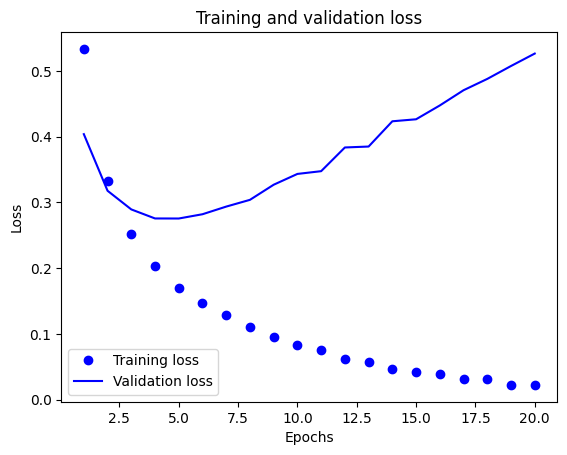

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

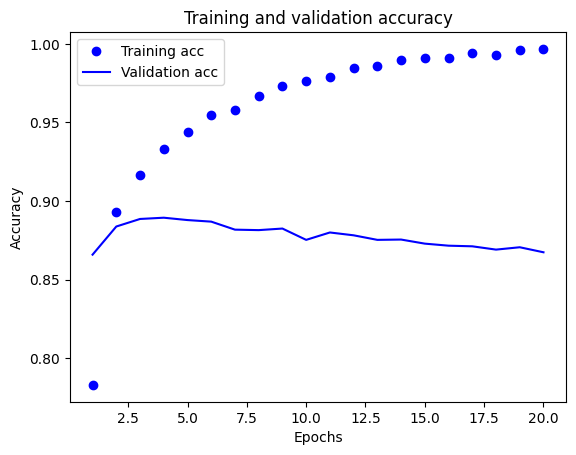

In [19]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 930us/step - loss: 0.5702 - accuracy: 0.8565


Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4741 - accuracy: 0.7890 - val_loss: 0.3273 - val_accuracy: 0.8758
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2711 - accuracy: 0.8955 - val_loss: 0.2757 - val_accuracy: 0.8886
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1988 - accuracy: 0.9243 - val_loss: 0.2766 - val_accuracy: 0.8861
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1478 - accuracy: 0.9467 - val_loss: 0.2986 - val_accuracy: 0.8847
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1315 - accuracy: 0.9498 - val_loss: 0.3200 - val_accuracy: 0.8806
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1067 - accuracy: 0.9635 - val_loss: 0.4257 - val_accuracy: 0.8629
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0917 - accuracy: 0.9682 - val_loss: 0.3708 - val_accuracy: 0.8794
Epoch 8/20
30

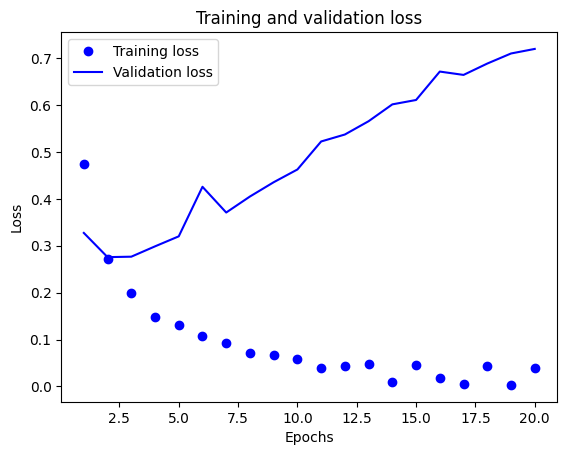

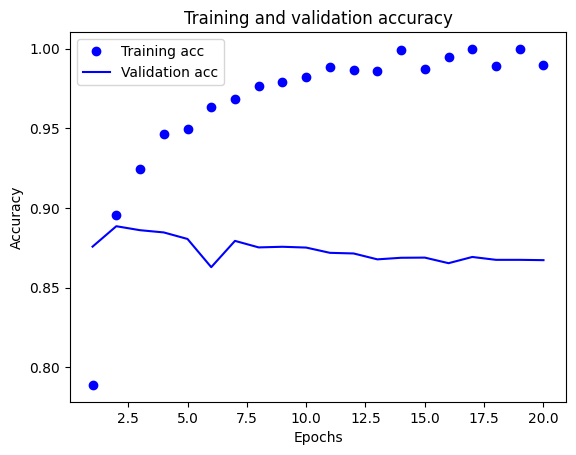

782/782 [==============================] - 1s 980us/step - loss: 0.7980 - accuracy: 0.8523
results: [0.7979958057403564, 0.8522800207138062]


In [24]:
model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

results = model.evaluate(x_test, y_test)
print(f"results: {results}")

### Classifying newswires: A multiclass classification example

In [25]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [26]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in     train_data[0]])
print(decoded_newswire)

550378/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [27]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

 One-hot encoding is a widely used format for categorical data, also called categorical encoding. In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index.

In [28]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1. 
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [29]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Epoch 1/20
16/16 [==============================] - 1s 21ms/step - loss: 2.8413 - accuracy: 0.4748 - val_loss: 1.9314 - val_accuracy: 0.5850
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.5966 - accuracy: 0.6557 - val_loss: 1.4130 - val_accuracy: 0.6960
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.2137 - accuracy: 0.7428 - val_loss: 1.2005 - val_accuracy: 0.7360
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.9958 - accuracy: 0.7853 - val_loss: 1.1131 - val_accuracy: 0.7520
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.8333 - accuracy: 0.8170 - val_loss: 1.0281 - val_accuracy: 0.7710
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.7072 - accuracy: 0.8438 - val_loss: 0.9566 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5903 - accuracy: 0.8720 - val_loss: 0.9260 - val_accuracy: 0.8000
Epoch 8/20
16

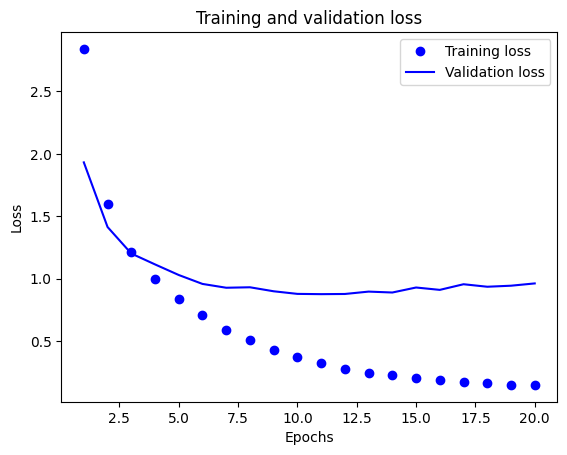

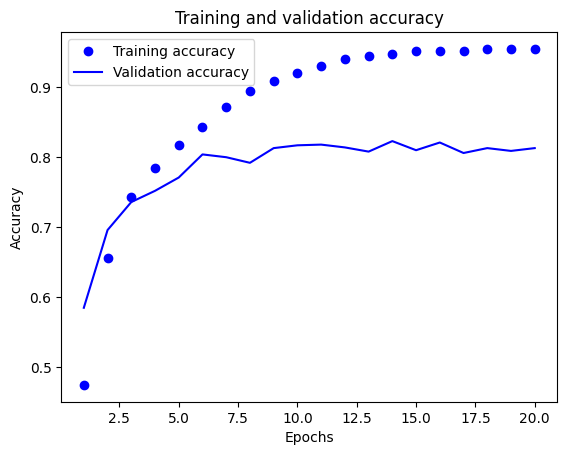

In [30]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [31]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 1ms/step - loss: 1.0610 - accuracy: 0.7876


another way to encode the labels would be to cast them as an integer tensor
he only thing this approach would change is the choice of the loss function. The loss function used in listing 4.21, categorical_crossentropy, expects the labels to follow a categorical encoding. With integer labels, you should use sparse_categorical_ crossentropy:

In [34]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
print(y_test)
print(test_labels)

[ 3 10  1 ...  3  3 24]
[ 3 10  1 ...  3  3 24]


### Predicting house prices: A regression example

In [35]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (
    boston_housing.load_data())

57026/57026 [==============================] - 0s 0us/step


 feature-wise normalization: for each feature in the input data (a column in the input data matrix), we subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation. 
 
 **normalizing the test data are computed using the training data.**

In [36]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

if you applied a sigmoid activation function to the last layer, the model could only learn to predict values between 0 and 1. Here, because the last layer is purely linear, the model is free to learn to predict values in any range.

In [37]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [43]:
num_epochs = 500 
all_mae_histories = [] 
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [44]:
print(all_scores)
print(np.mean(all_scores))

[1.9205565452575684, 2.3951475620269775, 2.487475633621216, 2.497541666030884]
2.3251803517341614


In [45]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

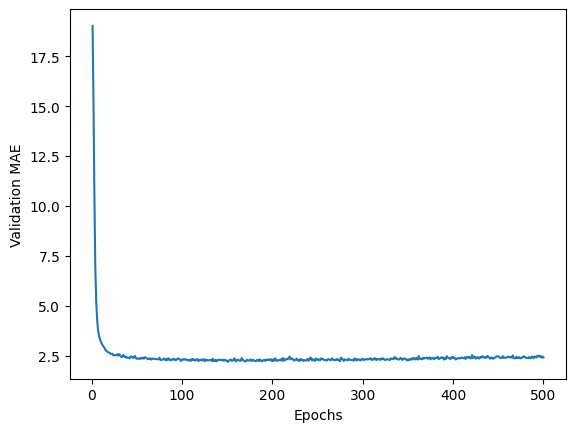

In [46]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()